# Classification of Market Trends Using Convolutional Neural Networks

**Zeus Morley S. Pineda**  
Mindanao State University - Iligan Institute of Technology  
[zeusmorley.pineda@g.msuiit.edu.ph](mailto:zeusmorley.pineda@g.msuiit.edu.ph)

[Dataset](https://drive.google.com/drive/folders/1iJAPnfSfsPiD6xGhPTfsca6ADNWlMlXa?usp=drive_link)


### Definition of the Problem ###

Recognizing the trend shown by several candlesticks can be challenging for people with little knowledge and experience in technical analysis, especially without the help of trading or charting platforms. Correctly classifying what is going on with a range of candles is important to make informed trading decisions.

Charting platforms have information regarding the candles shown, the value or price of the: highs, lows, opening, and closing. They can use this information to tell you whether this range of candles shows an uptrend, downtrend, or sideways. However, traders often rely on the visual patterns formed by the size and shape of candlesticks relative to their neighbors to recognize trends. This approach seeks to emulate a human-like pattern recognition by using CNN to classify candles by just their shape and size relative to each other.

---
**Objective in Business Terms**

The primary objective is to develop both an option and a solution. It is a solution for people trying to practice recognizing the trend. It is an option or an aid to people with experience, it will help them confirm whether their classification is similar to what is classified by the program. In both situations, it can help by improving their decision-making process. 

---
**Measuring Results**

The performance will be evaluated using metrics such as classification accuracy, precision, recall, and F1-score. An accuracy of at least 80% will be considered as sufficient for the model's validation. This accuracy is similar to the actual requirements of traders in the real world.

---
**Reusing Existing Tools and Libraries**

The project will use existing libraries and frameworks, such as TensorFlow or PyTorch to implement the model. Preprocessing and Augmentation tools like OpenCV or Pillow will be used to prepare the dataset. 

### Data Aquisition ###

The dataset will be composed of 128x128-pixel images of 5 candles, each will be classified as either uptrend, downtrend, or sideways. The image's resolution might be small but it will be enough since the candles are all composed of straight lines. The images can also get away with being grayscale or black and white since the important part is the shape and not the colors. 

The dataset will not undergo rotation, since in the real world the candles will always be vertical, there is never a scenario where the candles may be tilted or be horizontal.

The dataset will be gathered from [Tradingview.com](https://www.tradingview.com/), square screenshots of 5 candles will be taken and its resolution will be downscaled into 128x128 pixels.

### About the Dataset ###

There is a total of 120 images in the dataset. The classifications are uniformly distributed since there are 40 images per classifications: up, down, and side. All of the images in the dataset are consistently 128x128 pixels in resolution. All of the images are in black and white color.

There are no duplicate images, all of the images are in the right orientation i.e no rotated images. All of the images are also consistent in how zoomed in they are in order to fit the square 128x128 resolution. There are no images that contain candles that are cropped out. All images have all candles completely visible. 


### Loading the Libraries ###

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from tensorflow.keras import Input
from tensorflow.keras import backend as K
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import load_img, img_to_array

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

### Loading the Dataset ###

In [15]:
dataset_path = 'dataset/'

# Labels and corresponding folders
labels = ['up', 'down', 'side'] #0 1 2

# Load data
images = []
image_labels = []

for label_idx, label_name in enumerate(labels):
    folder = os.path.join(dataset_path, label_name)
    for file_name in os.listdir(folder):
        file_path = os.path.join(folder, file_name)
        img = load_img(file_path, color_mode='grayscale', target_size=(128, 128))
        img_array = img_to_array(img) / 255.0
        images.append(img_array)
        image_labels.append(label_idx)

# Convert to NumPy arrays
images = np.array(images)
image_labels = np.array(image_labels)

print(f"Loaded {len(images)} images with shape {images.shape}")

Loaded 330 images with shape (330, 128, 128, 1)


### Setting aside Training, Validation and Testing Datasets ###

In [16]:
X_train, X_temp, y_train, y_temp = train_test_split(images, image_labels, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print(f"Training data shape: {X_train.shape}, {y_train.shape}")
print(f"Validation data shape: {X_val.shape}, {y_val.shape}")
print(f"Test data shape: {X_test.shape}, {y_test.shape}")

Training data shape: (231, 128, 128, 1), (231,)
Validation data shape: (49, 128, 128, 1), (49,)
Test data shape: (50, 128, 128, 1), (50,)


### Analyzing the data with descriptive statistics ###

In [17]:
# Label distribution
unique, counts = np.unique(image_labels, return_counts=True)
print("Label Distribution:", dict(zip(labels, counts)))

# Show mean and standard deviation of pixel intensities
print("Mean pixel intensity (training set):", X_train.mean())
print("Standard deviation of pixel intensity:", X_train.std())

Label Distribution: {'up': np.int64(110), 'down': np.int64(110), 'side': np.int64(110)}
Mean pixel intensity (training set): 0.07095733
Standard deviation of pixel intensity: 0.21964985


### Visualizing the data by showing random samples ###

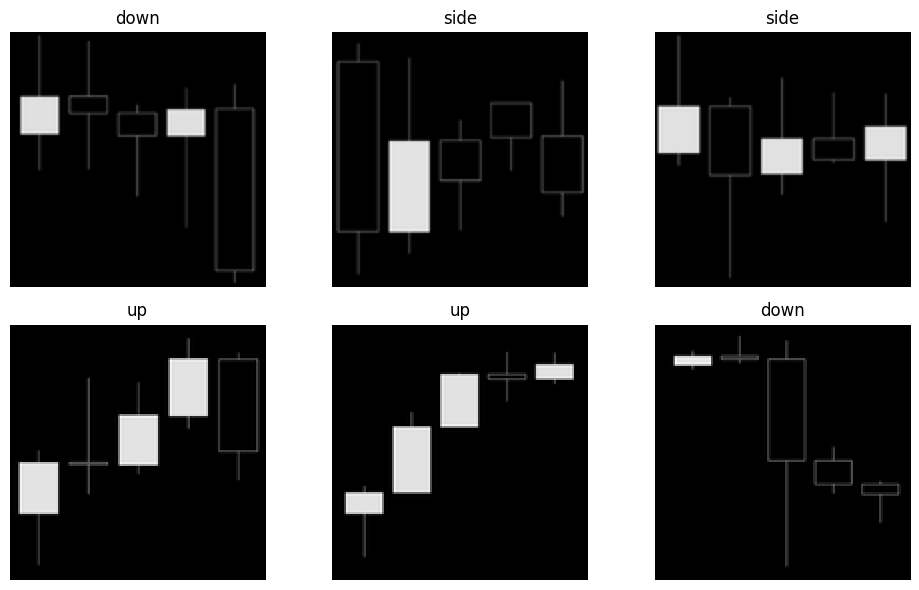

In [18]:
plt.figure(figsize=(10, 6))
for i in range(6):
    plt.subplot(2, 3, i + 1)
    idx = np.random.randint(0, len(X_train))
    plt.imshow(X_train[idx].reshape(128, 128), cmap='gray')
    plt.title(labels[y_train[idx]])
    plt.axis('off')
plt.tight_layout()
plt.show()

### Cleaning the data ###

In [19]:
print("Checking for NaNs in dataset:", np.isnan(X_train).any())

Checking for NaNs in dataset: False


### Selecting Features ###

The entire image is used as an input to the model

### Transform and Standardize Features ###
The pixel values were already normalized above.

### Building the Model ### 

In [20]:
model = Sequential([
    Input(shape=(128, 128, 1)),
    Conv2D(32, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.75),
    Dense(3, activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     7,372,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,392,131 (28.20 MB)

 Trainable params: 7,392,131 (28.20 MB)

 Non-trainable params: 0 (0.00 B)

None


### Training the Model and evaluation the test set ###

In [21]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val),  epochs=15, batch_size=16)

test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

Epoch 1/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 128ms/step - accuracy: 0.5480 - loss: 0.8670 - val_accuracy: 0.8776 - val_loss: 0.3870
Epoch 2/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 110ms/step - accuracy: 0.8065 - loss: 0.4541 - val_accuracy: 0.8980 - val_loss: 0.3448
Epoch 3/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 110ms/step - accuracy: 0.8983 - loss: 0.3173 - val_accuracy: 0.8776 - val_loss: 0.3075
Epoch 4/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 114ms/step - accuracy: 0.8808 - loss: 0.2902 - val_accuracy: 0.8776 - val_loss: 0.3364
Epoch 5/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 114ms/step - accuracy: 0.9172 - loss: 0.2368 - val_accuracy: 0.8776 - val_loss: 0.4165
Epoch 6/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 110ms/step - accuracy: 0.9120 - loss: 0.2061 - val_accuracy: 0.8367 - val_loss: 0.3828
Epoch 7/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 117ms/step - accuracy: 0.9738 - loss: 0.0884 - val_accuracy: 0.8163 - val_loss: 0.4782
Epoch 8/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 114ms/step - accuracy: 0.9716 - loss: 0.1236 - val_accuracy: 0.

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


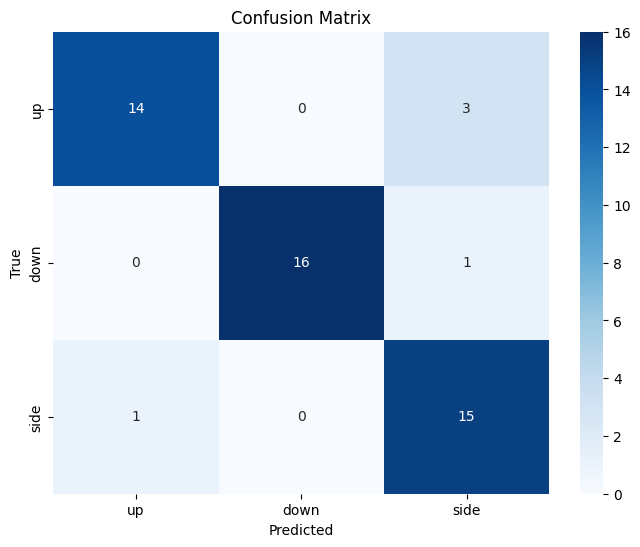


Classification Report:
              precision    recall  f1-score   support

          up       0.93      0.82      0.88        17
        down       1.00      0.94      0.97        17
        side       0.79      0.94      0.86        16

    accuracy                           0.90        50
   macro avg       0.91      0.90      0.90        50
weighted avg       0.91      0.90      0.90        50



In [22]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1) 

y_true = y_test

cm = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

print("\nClassification Report:")
print(classification_report(y_true, y_pred_classes, target_names=labels))

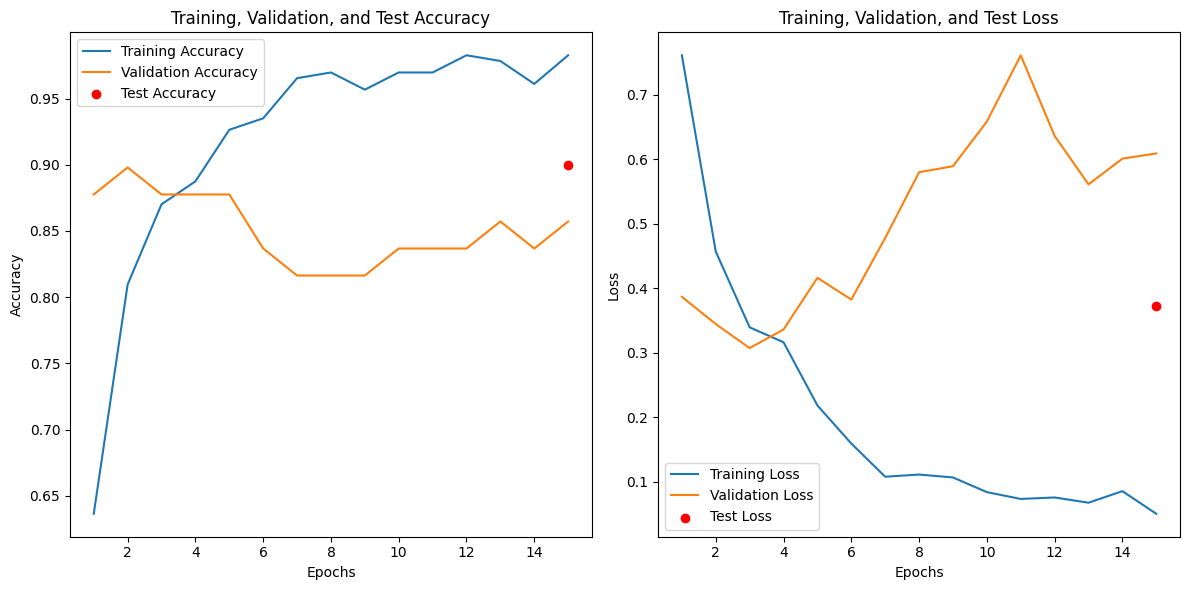

Final Accuracy Gap (Training - Validation): 12.55%
Final Loss Gap (Training - Validation): -55.89%


In [23]:
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(train_acc) + 1)

final_accuracy_gap = train_acc[-1] - val_acc[-1]
final_loss_gap = train_loss[-1] - val_loss[-1]

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(epochs, train_acc, label='Training Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.scatter(len(epochs), test_accuracy, color='red', label='Test Accuracy')
plt.title('Training, Validation, and Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, train_loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.scatter(len(epochs), test_loss, color='red', label='Test Loss')
plt.title('Training, Validation, and Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

print(f"Final Accuracy Gap (Training - Validation): {final_accuracy_gap*100:.2f}%")
print(f"Final Loss Gap (Training - Validation): {final_loss_gap*100:.2f}%")

### Visualizing which datasets were recognized wrongly. ###

Test Accuracy: 90.00%
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Number of misclassified examples: 5


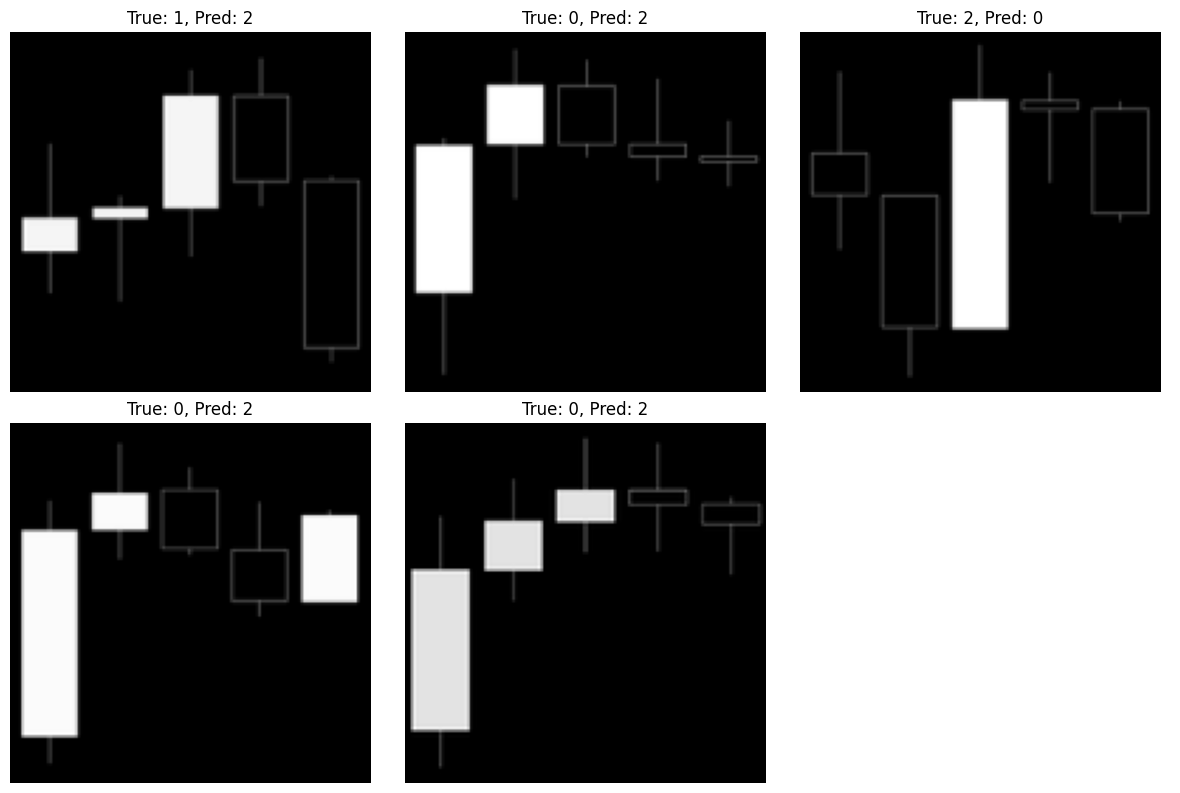

In [24]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = y_test
misclassified_indices = np.where(predicted_classes != true_classes)[0]
print(f"Number of misclassified examples: {len(misclassified_indices)}")

num_images = len(misclassified_indices)
num_rows = (num_images + 2) // 3 

fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(12, num_rows * 4))

axes = axes.flatten()

for i, idx in enumerate(misclassified_indices):
    ax = axes[i]
    ax.imshow(X_test[idx].squeeze(), cmap='gray')
    ax.set_title(f"True: {true_classes[idx]}, Pred: {predicted_classes[idx]}")
    ax.axis('off')

for i in range(num_images, len(axes)):
    axes[i].axis('off')

plt.tight_layout()
plt.show()

In [25]:
K.clear_session()